# Autoencoders

Today we will use `keras` in `tensorflow` to build an autoencoder. We will use a simple neural network architecture that is composed of an input layer a lower-dimensional latent space, and an output layer of equal size.

<img src="https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-06-at-3.17.13-PM.png" width="400" />

Autoencoders are an *unsupervised learning* method. We will use an autoencoder to create a latent space representation of the `digits` dataset, a reduced-dimension version of the `MNIST` dataset. Replacing the `digits` dataset with the larger `MNIST` dataset is perhaps a more useful activity, but increases the runtime of the algorithm.

In [1]:
# packages used in notebook!

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import datasets, cluster # for k-means clustering
import random # if we want to create a Variational Autoencoder

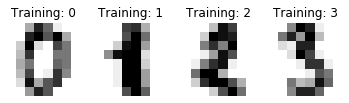

In [2]:
# The digits dataset, made of already small 8x8 pixel images of digits 0-9
digits = datasets.load_digits()

# let's have a look at the first 4 images, stored in the `images` attribute of the
# dataset. 

# let's keep labels in case we want them later
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data = data/255.

In [3]:
# print the number of features and the number of training examples
print(len(data[0]))
print(n_samples)

64
1797



Now we build the autoencoder. Ours is a standard feed-forward neural network architecture with three layers as descibed above.

Let's start by reducing our dimensionality by a factor of two and see if we can recover our original images.

One way to build an autoencoder is to store each layer into a variable so that we can access the different pieces later. 

*Note: I achieved my best performance with a `relu` activation function. On both the encoded and output layers*

In [ ]:
# latent_dim = 32

# define your Input layer

# define your encoded layer

# define your output layer


# put the layer together to create your Model


In [ ]:
# compile the autoencoder model


In [ ]:
# train the autoencoder


Now that we have out autencoder model, let's also use the layers we already made to construct an **encoder** and **decoder** model, so we can use each piece separately.

In [ ]:
# build encoder and decoder models


In [ ]:
# produce predictions from your trained model
#encoded_imgs = 
#decoded_imgs = 



In [ ]:
# Let's take a look at some images that our autoencoder produced
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### *If there is time*:
### We can then try k-means clustering on the latent space to see if we can separate numbers

In [ ]:
# use sklearn's KMeans to cluster on the autoencoder's latent space:
#y_pred = 

In [ ]:
# plot a subset of examples and their cluster assignment
for i in range(25):
    fig = plt.subplot(5, 5, i + 1)
    plt.tight_layout()
    plt.imshow(data[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('y_pred: %i' % y_pred[i])
plt.show()



In [ ]:
# look at cluster 1
for i in range(len(data)):
    if y_pred[i] == 1:
        plt.imshow(data[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('y_pred: %i' % y_pred[i])
        plt.show()

In [ ]:
# look at cluster 2
for i in range(len(data)):)
    if y_pred[i] == 2:
        plt.imshow(data[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('y_pred: %i' % y_pred[i])
        plt.show()

You can also try to use your trained decoder as a number generator! You provide the decoder with a latent space input that is of similar values to the ones you got in training. So many fun things to try!

Save as `lastname1_lastname2_autoencoder.ipynb` and submit on Moodle.